# SBD MSG Location Plotter

In [1]:
import pandas as pd
import os

#%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cmocean

In [2]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8,4),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        ax.xaxis.set_major_formatter = LongitudeFormatter
        ax.yaxis.set_major_formatter = LatitudeFormatter
        gl.ylabel_style = {'size': 10, 'color': 'blue'}
        gl.xlabel_style = {'size': 10, 'color': 'blue'}
    return fig, ax

## A list of pop-up units that transmitted data from the field
#### *year deployed* - *imei number* - *site: SBD Active/Inactive* 
 - 2018 - 300434063921240 - C2: Inactive  <br>
 - 2018 - 300434063823800 - C10/C11: Inactive  <br>
 - 2018 - 300434063928220 - C12: Inactive  <br>
 - 2018 - 300434063925210 - M5: Inactive  <br>
 <br>
 - 2019 - 300434063470010 - S.W. of M5: Inative  <br>
 - 2019 - 300434063477010 - N.W. of M5: Inactive  <br>
 - 2019 - 300434063861360 - N.E. of Saint Lawrence: Inactive  <br>
 - 2019 - 300434063474010 - M8 PopTop: Inactive  <br>
 <br>
 - 2020 - 300434063479200 - C2: Active  <br>
 - 2020 - 300434063924230 - C12: Active  <br>
   <br>
 - 2020 - 300434063863550
 - 2020 - 300434063471670
 - 2020 - 300434063473020
 - 2020 - 300434063471040
 - 2020 - 300434063472040
 - 2020 - 300434063862560
 - 2020 - 300434063472010

# *INPUT*

In [3]:
# id_dir=['300434063863550','300434063471670','300434063473020','300434063471040','300434063472040','300434063862560','300434063472010',
#         '300434063764860', '300434063472030','300434063924230']

instid = '300434063862560' # INPUT unit imei number
sn = instid[-4:] # INPUT last 4 digits of imei
year = '2020' # INPUT year of deployment 
file = os.path.join('..', 'results', year, instid, 'message_position.csv')
df = pd.read_csv(file,
                 parse_dates=True,index_col='datetime')
print(df)

                     IMEI_message_id  latitude  longitude  CEPradius
datetime                                                            
2021-09-15 06:04:11  300434063862560  55.20768 -166.16196          2
2021-09-15 06:04:23  300434063862560  55.20768 -166.16196          2
2021-09-15 09:50:52  300434063862560  55.26390 -166.20802          4
2021-09-15 10:16:10  300434063862560  55.26390 -166.20802          4
2021-09-15 12:41:58  300434063862560  55.32010 -166.25421          3
...                              ...       ...        ...        ...
2021-09-26 23:30:55  300434063862560  55.20462 -168.41888          2
2021-09-26 23:31:04  300434063862560  55.22759 -168.34462          2
2021-09-27 00:43:36  300434063862560  55.22759 -168.34462          3
2021-09-27 05:10:57  300434063862560  55.25404 -168.40624          2
2021-09-27 05:12:49  300434063862560  55.25404 -168.40624          4

[328 rows x 4 columns]


# *RUN SCRIPT*

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
No handles with labels found to put in legend.


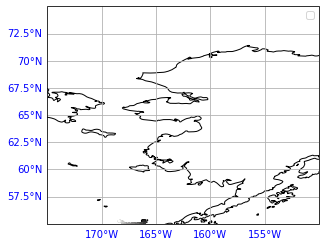

In [4]:
projection=ccrs.PlateCarree()
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-175, -150, 55, 75]
fig,ax = make_map(projection=projection)

ax.scatter(df['longitude'], df['latitude'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

leg = ax.legend()

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

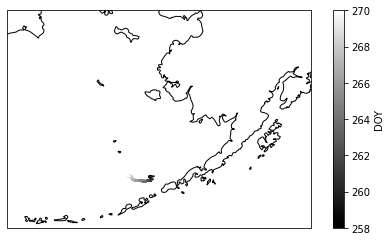

In [12]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

# extent = [-200, -160, 65, 74]
extent = [-180, -150, 52, 64]

fig,ax = make_map(projection=projection)

sm=ax.scatter(df['longitude'], df['latitude'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.colorbar(sm,ax=ax,label='DOY')

In [13]:
fig.savefig(file.replace('csv','png'),dpi=300)

### and using SST location information

In [7]:
file = os.path.join('..', 'results', year, instid, sn + '_sst_data.csv')

try:
    df = pd.read_csv(file,
                 parse_dates=True,index_col='datetime')
except:
    print('no sst data')


no sst data


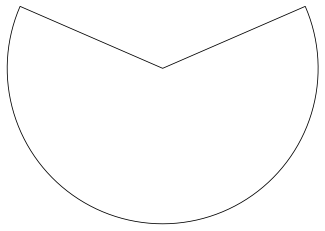

In [8]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-180, -150, 65, 74]
fig,ax = make_map(projection=projection)

try:

    sm=ax.scatter(df['GPSLon'], df['GPSLat'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)
    plt.colorbar(sm,ax=ax,label='DOY')
    
except:
        ('no sst data')

In [9]:
fig.savefig(file.replace('.csv','GPSmap.png'),dpi=300)

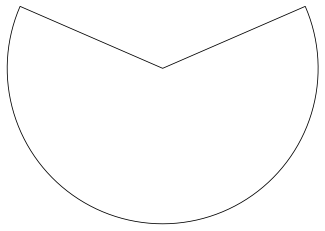

In [10]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-180, -150, 65, 74]
fig,ax = make_map(projection=projection)

try:

    sm=ax.scatter(df['GPSLon'], df['GPSLat'], s=1,
           c=df.sr_temp, cmap=cmocean.cm.thermal,
           transform=transformation)

    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)
    plt.colorbar(sm,ax=ax,label='SST')
    
except:
        ('no sst data')

In [11]:
fig.savefig(file.replace('.csv','GPSmapSST.png'),dpi=300)